You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


Let's prepare the data, starting by first indentifying the datatypes for each attribute.

In [3]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   week               54 non-null     object
 1   chatgpt            54 non-null     int64 
 2   gemini             54 non-null     int64 
 3   microsoft_copilot  54 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


From the .info() function we can see that the week is set as a generic data type even through it is a datetime value. Let's convert it to the proper format and also set week as the main index for our time series.

In [6]:
trends.week = pd.to_datetime(trends.week) # Converting to date time
trends.set_index('week', inplace=True) # setting the index
print(trends.head())

            chatgpt  gemini  microsoft_copilot
week                                          
2023-08-27       56       3                  1
2023-09-03       56       3                  1
2023-09-10       63       3                  1
2023-09-17       64       3                  1
2023-09-24       66       3                  1


Now, let's analyze the most consistant AI tool based on their growth. We can do this by calculating the percent change and determining consistency through standard deviation.

In [15]:
# Calculate percent change (growth rate) for each AI tool
growth_rates = trends.pct_change().dropna()

# Calculate standard deviation of growth rates for each tool
std_devs = growth_rates.std()

# Identify the tool with the lowest standard deviation (most consistent growth)
most_consistent_tool = std_devs.idxmin()
most_consistent_tool

'chatgpt'

From our previous analysis, we can see that chatgpt had the most consistent growth out of all the tools. Now let's visualize the interest levels of all the tools to interpret the bigger picture.

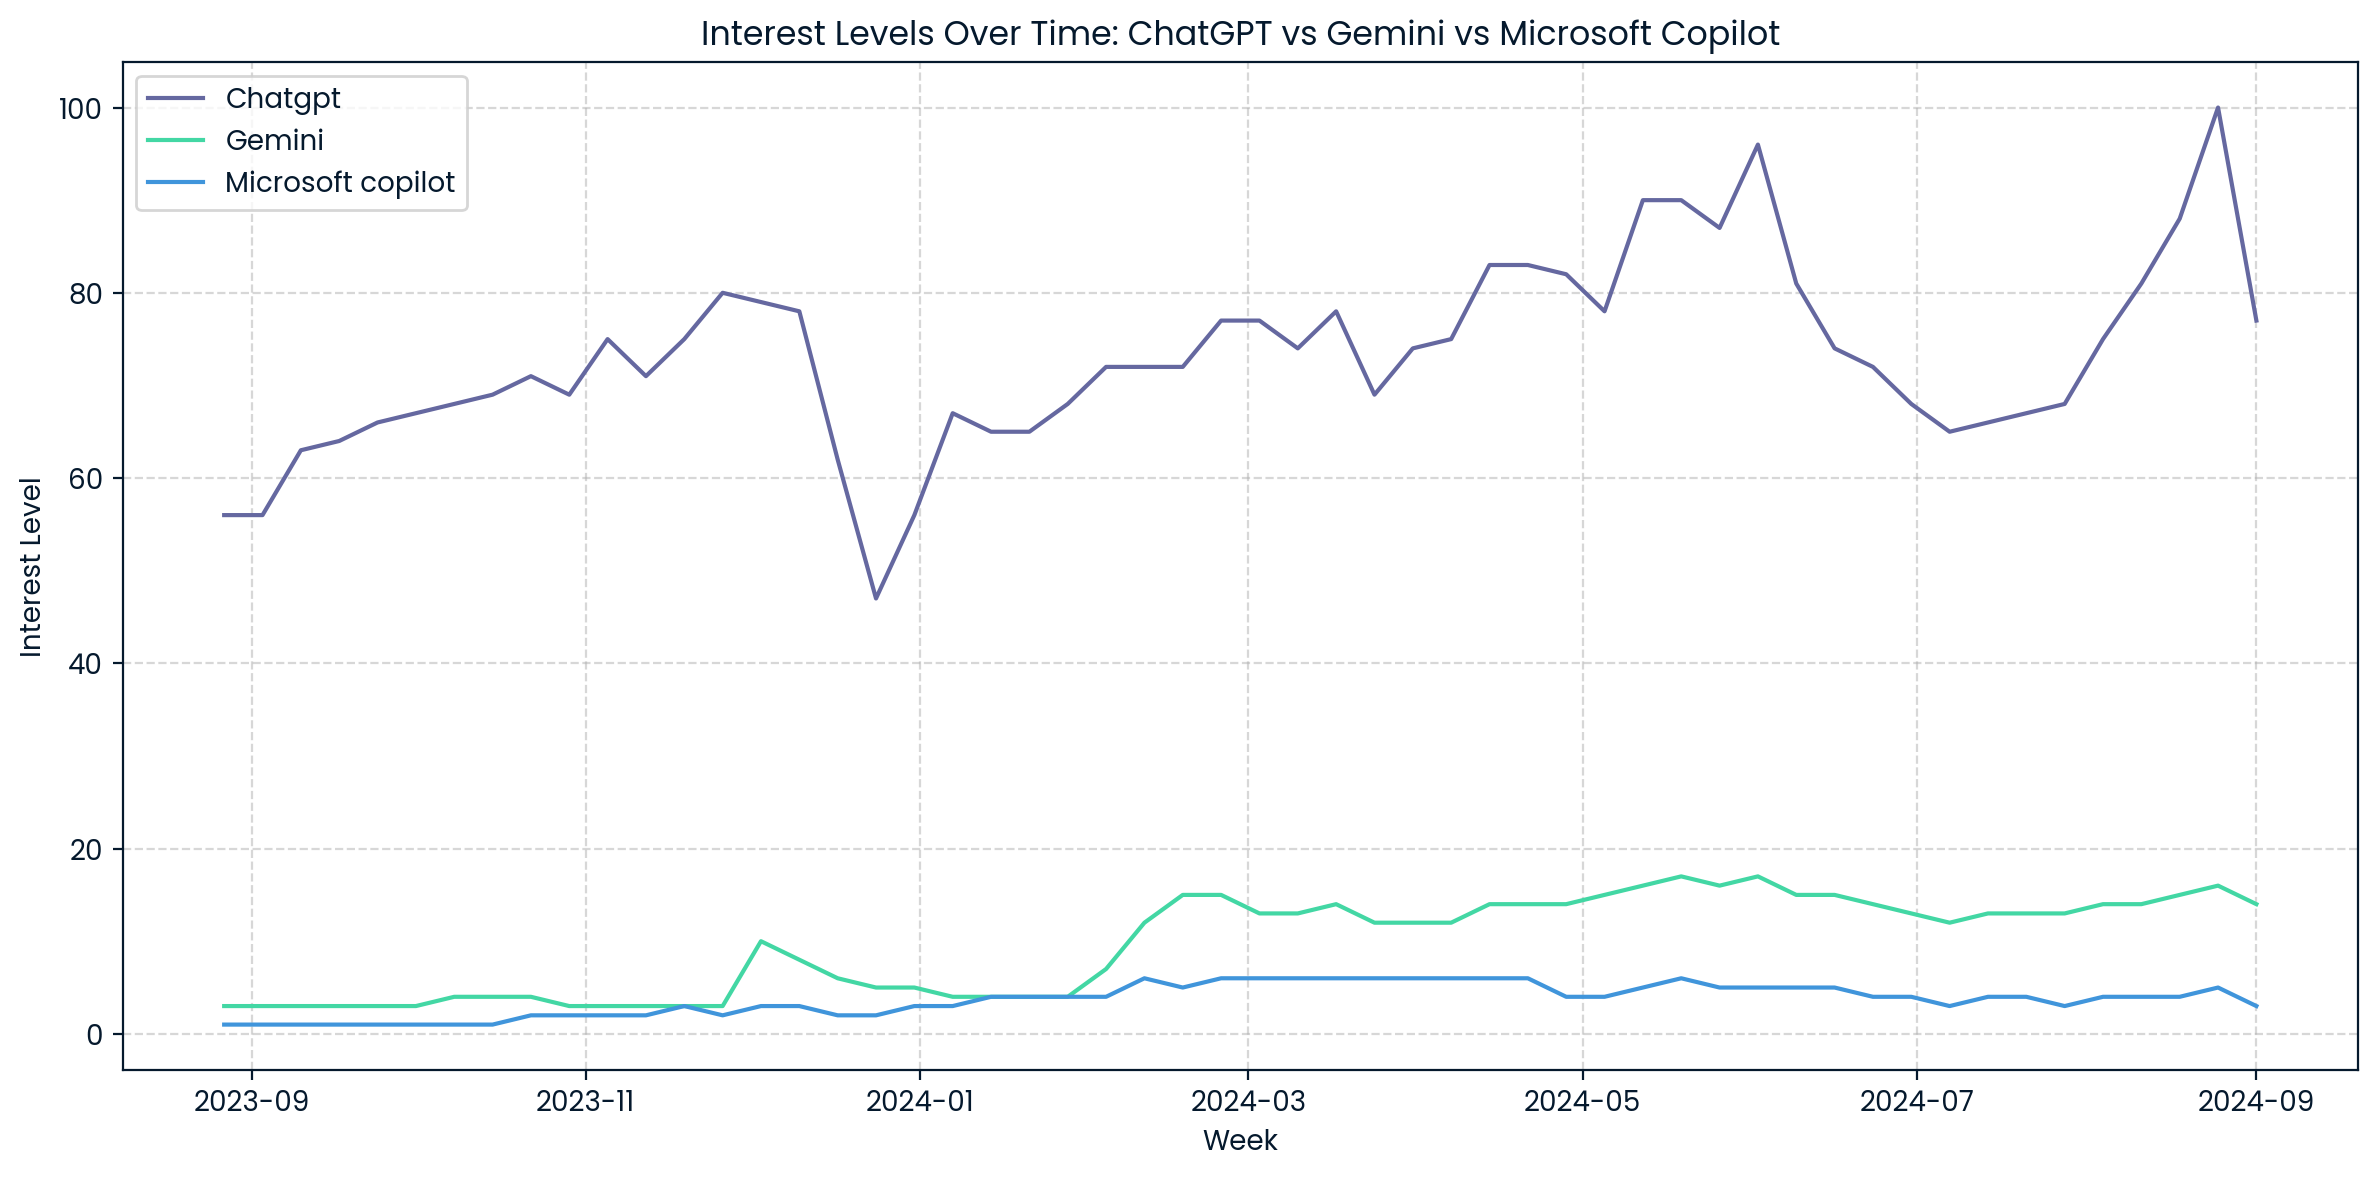

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for tool in trends.columns:
    plt.plot(trends.index, trends[tool], label=tool.capitalize().replace('_', ' '))

plt.title('Interest Levels Over Time: ChatGPT vs Gemini vs Microsoft Copilot')
plt.xlabel('Week')
plt.ylabel('Interest Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From this chart we can see that the greatest dip for ChatGPT occurs between 12/2023 and 1/2024.


In [ ]:
gpt_dip = "December 2023"

Now, let's resample the data into monthly averages to detect seasonal trends and determine which month had the highest avarage interest from all the tools.

In [19]:
# Resample the trends data to monthly averages
monthly_avg = trends.resample('M').mean()

# Calculate the average interest across all tools for each month
monthly_avg['all_tools_avg'] = monthly_avg.mean(axis=1)

# Find the month with the highest average interest
max_month = monthly_avg['all_tools_avg'].idxmax()
max_value = monthly_avg['all_tools_avg'].max()

# highlight the month with the highest average interest
max_month
monthly_avg

,chatgpt,gemini,microsoft_copilot,all_tools_avg
week,,,,
2023-08-31,56.00,3.00,1.00,20.000000
2023-09-30,62.25,3.00,1.00,22.083333
2023-10-31,68.80,3.60,1.40,24.600000
2023-11-30,75.25,3.00,2.25,26.833333
2023-12-31,64.40,6.80,2.60,24.600000
2024-01-31,66.25,4.00,3.75,24.666667
2024-02-29,73.25,12.25,5.25,30.250000
2024-03-31,74.40,12.80,6.00,31.066667
2024-04-30,80.75,13.50,5.50,33.250000


From this, it is clear that the month with the highest average interest is May.

In [ ]:
best_month = "May"